## Project #1: Bigmart Sale Prediction

<a id = "#initialization"></a>
<h2>Initializing Packages and Importing Data</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

train = pd.read_csv("data/Train.csv") 
test = pd.read_csv("data/Test.csv") 

<a id = "#viewdata"></a>
<h2>Taking a peak at our data</h2>

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Check for Unique ID
uniqueId = len(set(train.Item_Identifier))
totalID = train.shape[0]
print("There are " + str(uniqueId) + " Unique IDs for " + str(totalID) + " total entries")

There are 1559 Unique IDs for 8523 total entries


<h2>1. Exploratory Data Analysis (EDA)</h2>
<h3>1.1. Univariate Distribution</h3>
<h4>1.1.1.  Distribution of the target variable : Item_Outlet_Sales</h4>

Text(0.5, 1.0, 'Target(Item_Outlet_Sales) Distribution')

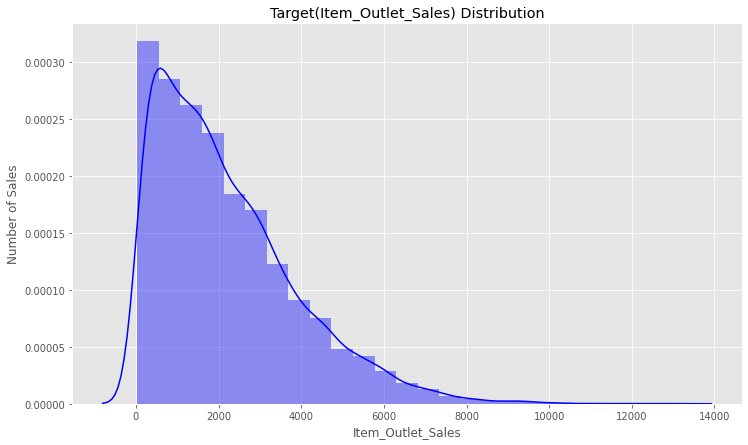

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25, color = 'blue')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Target(Item_Outlet_Sales) Distribution")


In [10]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


<h4>1.1.2. Numerical Variables</h4>


In [11]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [12]:
numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'correlation between Numerical features and Target')

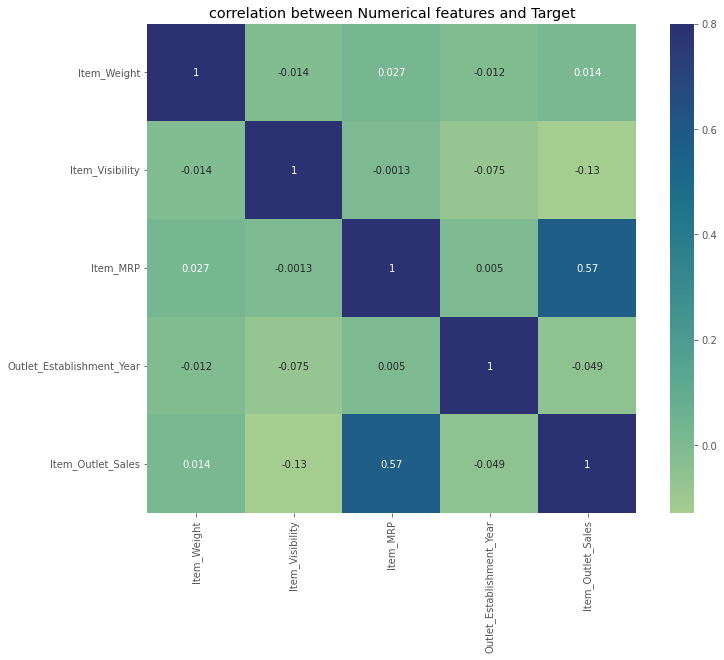

In [13]:
numeric_features.corr()
corr = numeric_features.corr()
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True,annot=True,cmap="crest")
ax.set_title('correlation between Numerical features and Target')

<h4>1.1.3. Categorical Variables</h4>
<h5>1.1.3.1. Distribution of the Item_Fat_Content</h5>

In [14]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

[Text(0.5, 1.0, 'Distribution of the Item_Fat_Content')]

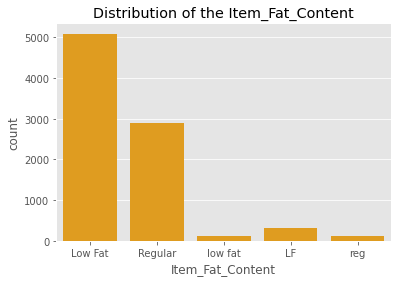

In [15]:
sns.countplot(train.Item_Fat_Content,color = 'orange').set(title='Distribution of the Item_Fat_Content')

<h5>1.1.3.2. Distribution of the Item_Type</h5>

In [16]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

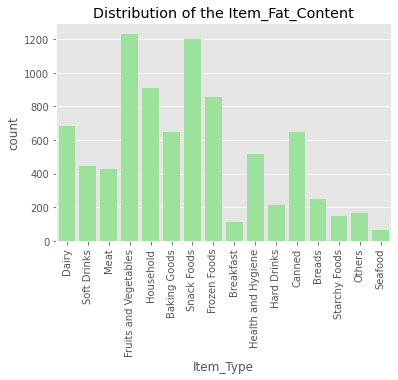

In [17]:
sns.countplot(train.Item_Type, color = 'lightgreen').set(title='Distribution of the Item_Fat_Content')
plt.xticks(rotation=90)


<h5>1.1.3.3. Distribution of the Outlet_Size</h5>

In [18]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

[Text(0.5, 1.0, ' Distribution of the Outlet_Size')]

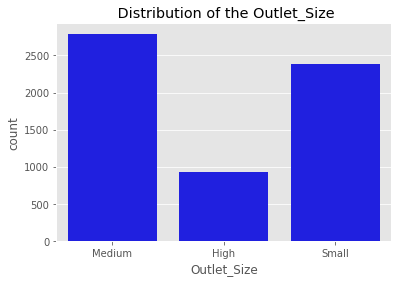

In [19]:
sns.countplot(train.Outlet_Size, color = 'blue').set(title=' Distribution of the Outlet_Size')

<h5>1.1.3.4. Distribution of the Outlet_Location_Type</h5>

In [20]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

[Text(0.5, 1.0, 'Distribution of Outlet_Location_Type')]

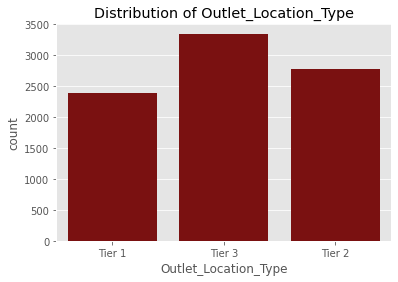

In [21]:
sns.countplot(train.Outlet_Location_Type, color = 'darkred').set(title='Distribution of Outlet_Location_Type')

<h5>1.1.3.5. Distribution of the Outlet_Type</h5>

In [22]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

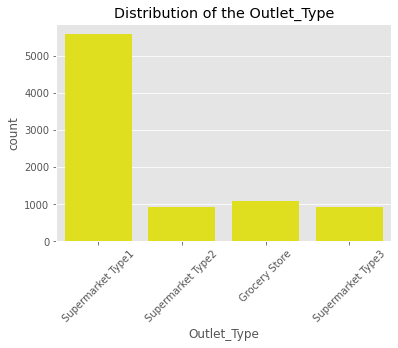

In [23]:
sns.countplot(train.Outlet_Type, color = 'yellow').set(title='Distribution of the Outlet_Type')
plt.xticks(rotation=45)

<h3>1.2. Bivariate Distribution</h3>
<h4>1.2.1. Numerical Variables</h4>
<h5>1.2.1.1. Item_Weight and Item_Outlet_Sales Analysis</h5>

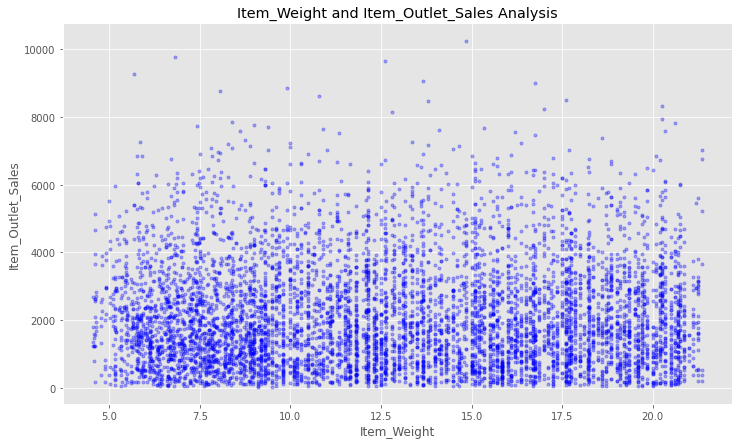

In [24]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3,  color = 'blue')

<h5>1.2.1.2. Item_Visibility and Item_Outlet_Sales Analysis</h5>

<h5>1.2.1.3. Item_MRP and Item_Outlet_Sales Analysis</h5>

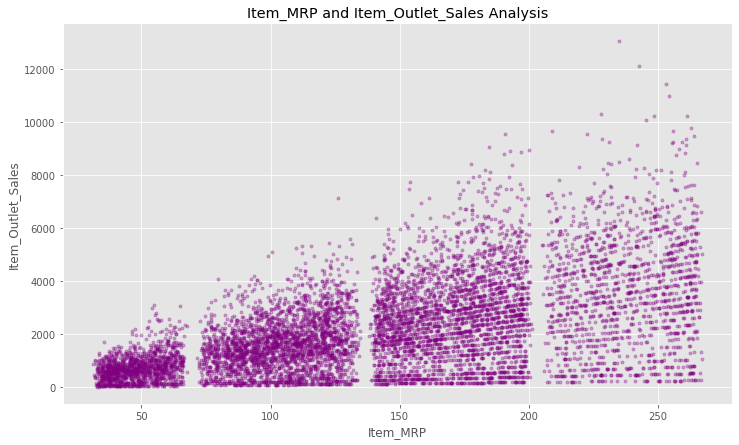

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3, color = 'purple')

<h5>1.2.1.4. Outlet_Establishment_Year and Item_Outlet_Sales Analysis</h5>

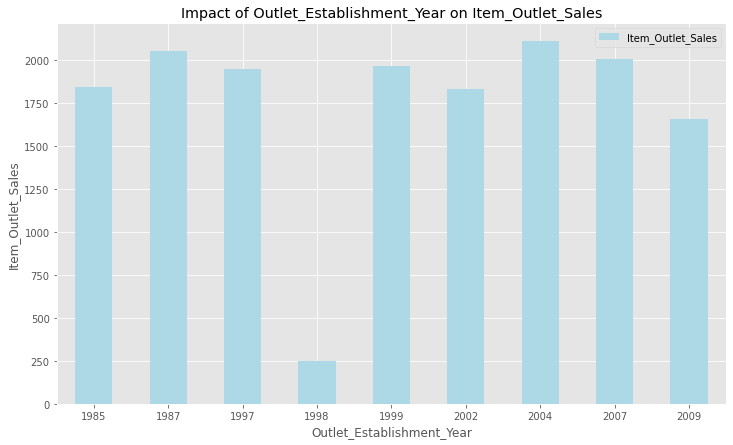

In [26]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h4>1.2.2. Categorial Variables</h4>

In [27]:
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

<h5>1.2.2.1. Impact of Item_Identifier on Item_Outlet_Sales</h5>

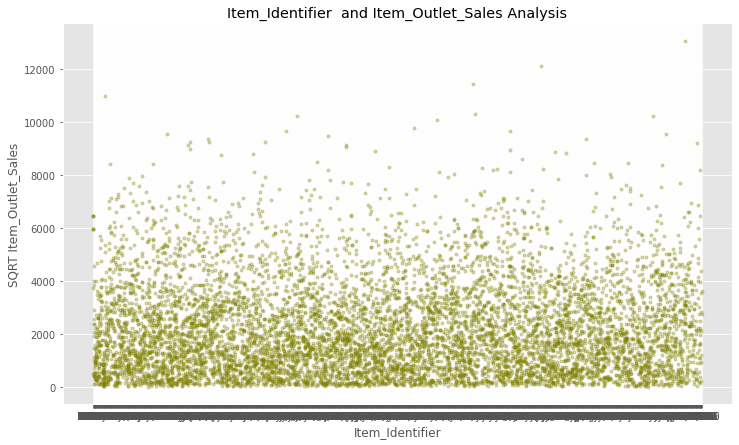

In [28]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Identifier , train["Item_Outlet_Sales"],'.', alpha = 0.3,  color = 'olive')

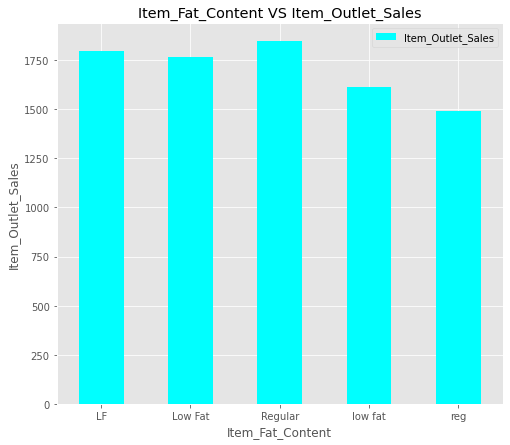

In [29]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='cyan',figsize=(8,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content VS Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h5>1.2.2.3. Impact of Outlet_Identifier on Item_Outlet_Sales</h5>

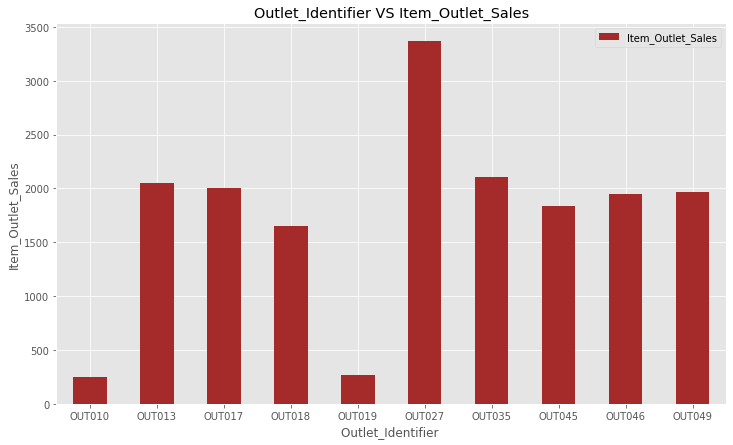

In [30]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='brown',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Identifier VS Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

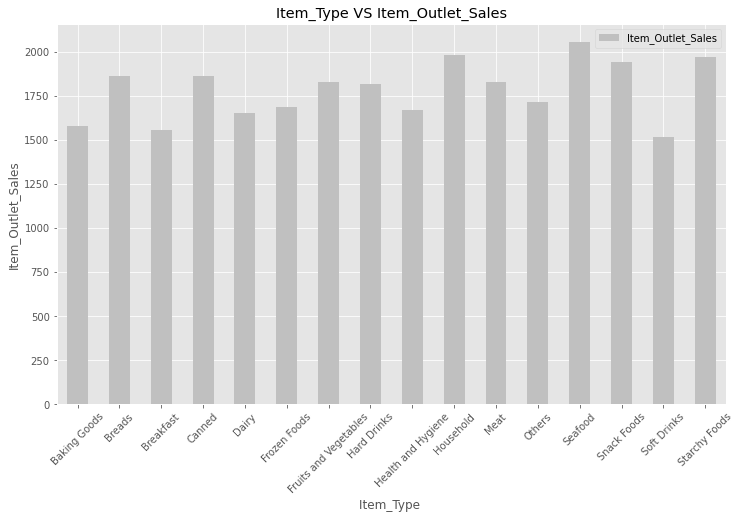

In [31]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='silver',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type VS Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.show()

In [32]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [33]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


<h5>1.2.2.4. Impact of Outlet_Size on Item_Outlet_Sales</h5>

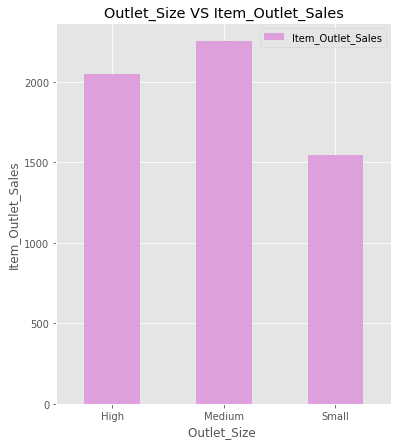

In [34]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='plum',figsize=(6,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Size VS Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h5>1.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales</h5>

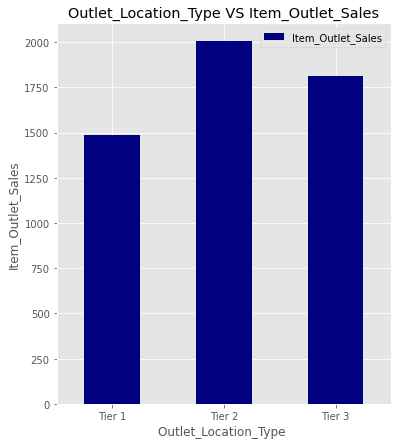

In [35]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='navy',figsize=(6,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Location_Type VS Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

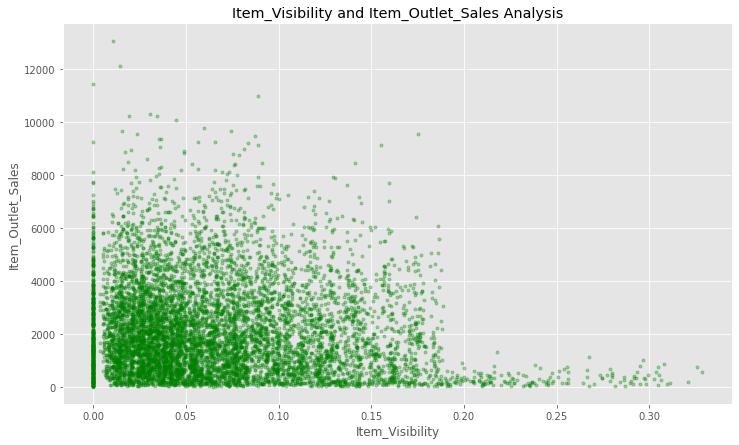

In [36]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3,color = 'green')

In [37]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


<h5>1.2.2.6. Impact of Outlet_Type on Item_Outlet_Sales</h5>

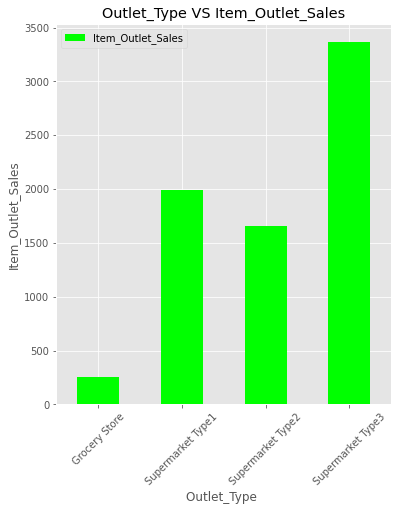

In [38]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='lime',figsize=(6,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Type VS Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.show()

<h5>1.2.2.7. Impact of Item_Type on Item_Outlet_Sales</h5>

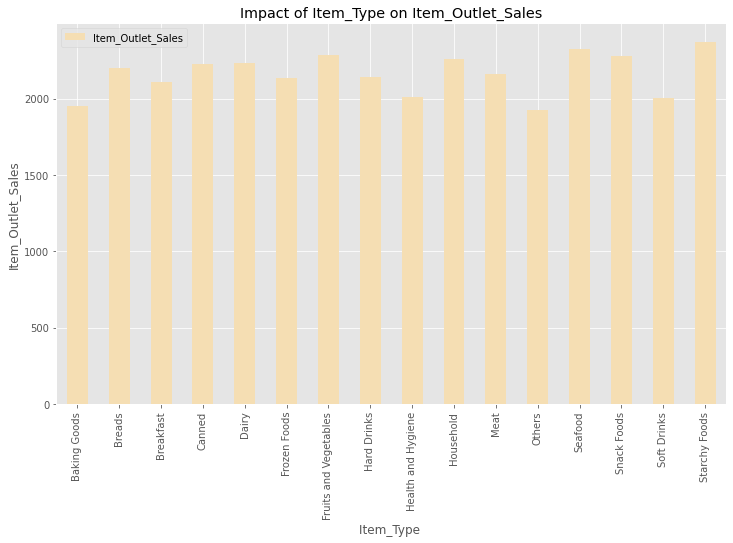

In [39]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='wheat',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

<h5>1.2.2.8. Impact of Item_Type vs Item_Visibility</h5>

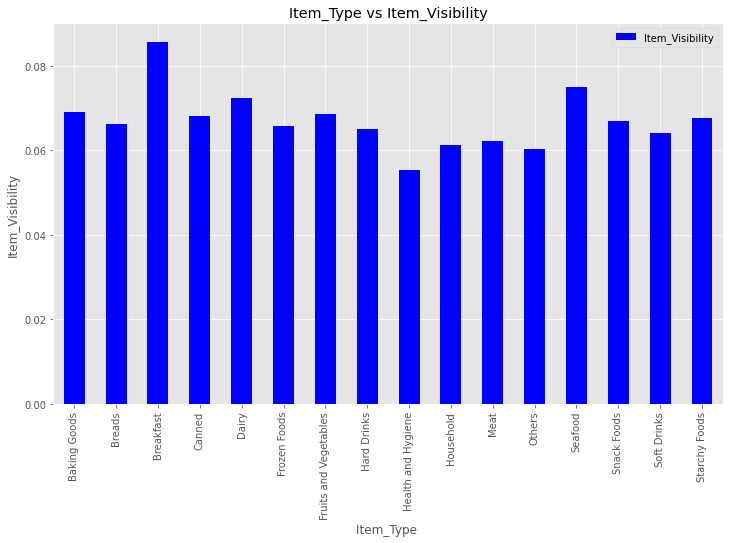

In [40]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

<h2>2. Data Pre-Processing</h2>
<h3> 2.1. Looking for missing values</h3>

In [41]:
# creat a new colum to Join Train and Test Dataset into a data set
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("data/data.csv",index=False)
# print(train.shape, test.shape, data.shape)
print("Train shape:") 
print(train.shape)
print("Test shape:") 
print(test.shape)
print("Joinded data.shape:") 
print(data.shape)

Train shape:
(8523, 13)
Test shape:
(5681, 12)
Joinded data.shape:
(14204, 13)


<h3> 2.2. Imputing Missing Values </h3>

In [42]:
 #aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [43]:
def impute_Item_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Item_weight Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))

Item_weight Orignal #missing: 2439


In [44]:
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_Item_weight,axis=1).astype(float)
print ('Item_weight Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Item_weight Final #missing: 0


<h3> 2.3. Imputing Outlet_size with the mode</h3>


In [45]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [46]:
def impute_Outlet_size(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Outlet_size Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))

Outlet_size Orignal #missing: 4016


In [47]:
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_Outlet_size,axis=1)
print ('Outlet_size Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Outlet_size Final #missing: 0


<h2>3. Feature Engineering</h2>

<h4> 3.1. Should we combine Outlet_Type?</h4>


In [48]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


<h4> 3.2. Item_Visibility minimum value 0</h4>

In [49]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [50]:
def impute_Item_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Item_visibility Original #zeros: %d'%sum(data['Item_Visibility'] == 0))

Item_visibility Original #zeros: 879


In [51]:
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_Item_visibility_mean,axis=1).astype(float)
print ('Item_visibility Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Item_visibility Final #zeros: 0


<h4> 3.3. Determine the years of operation of a store</h4>


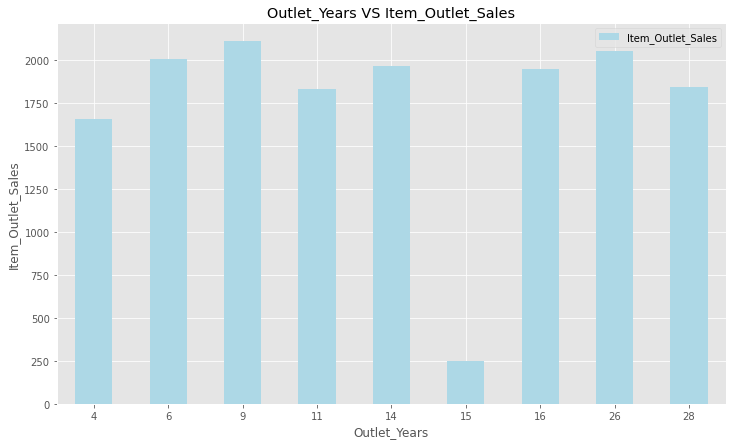

In [52]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
#data['Outlet_Years'].describe()

Outlet_Establishment_Year_pivot = \
data.pivot_table(index='Outlet_Years', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Outlet_Years")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Years VS Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h4> 3.4. Create a broad category of Type of Item</h4>

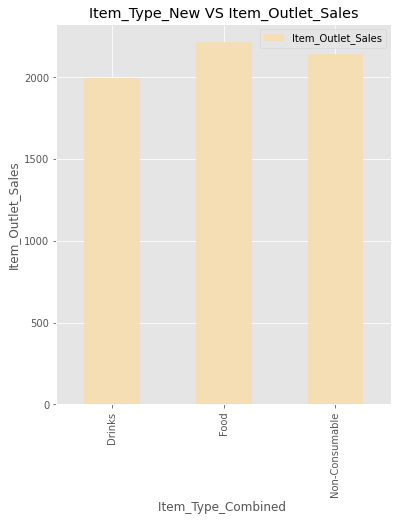

In [53]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
# data['Item_Type_Combined'].value_counts()
pivoTable = \
data.pivot_table(index='Item_Type_Combined', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='wheat',figsize=(6,7))
plt.xlabel("Item_Type_Combined ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type_New VS Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

<h4> 3.5. Modify categories of Item_Fat_Content</h4>


In [54]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('Modified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})




Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Modified Categories:


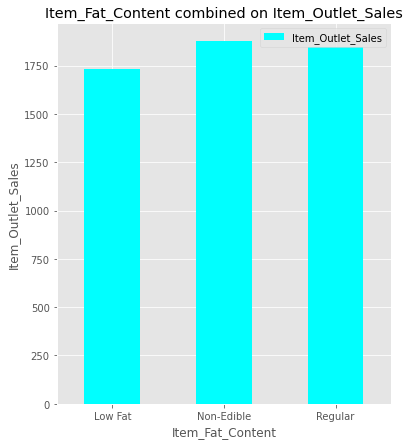

In [55]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='cyan',figsize=(6,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content combined on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h2>4. Feature Transformations</h2>

<h4> 4.1. Creating variable Item_Visibility_MeanRatio</h4>

In [56]:
Creating_MeanRatio = lambda x:x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]

data['Item_Visibility_MeanRatio'] = data.apply(Creating_MeanRatio,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()


count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

<h4> 4.2. Numerical and Categorical Variables – Dummy variables</h4>

In [58]:
#Import library:
from sklearn.preprocessing import LabelEncoder

#New variable for outlet
var_Category = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier',]
for i in var_Category:
    data[i] = LabelEncoder().fit_transform(data[i])

In [59]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet_Identifier'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Establishment_Year  14204 non-null  int64  
 6   Item_Outlet_Sales          8523 non-null   float64
 7   source                     14204 non-null  object 
 8   Outlet_Years               14204 non-null  int64  
 9   Item_Visibility_MeanRatio  14204 non-null  float64
 10  Item_Fat_Content_0         14204 non-null  uint8  
 11  Item_Fat_Content_1         14204 non-null  uint8  
 12  Item_Fat_Content_2         14204 non-null  uint8  
 13  Outlet_Location_Type_0     14204 non-null  uin

<h4> 4.3. Exporting Data</h4>


In [21]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

NameError: name 'data' is not defined

<h2>5. Model, predict and solve the problem</h2>

In [4]:
from sklearn.model_selection import train_test_split


train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')
#Drop unnecessary columns:
y_train = train_df.Item_Outlet_Sales
train_df.drop(['Item_Type','Outlet_Establishment_Year','source','Item_Identifier', 'Item_Outlet_Sales'], axis=1,inplace=True)
test_df.drop(['Item_Type','Outlet_Establishment_Year','source','Item_Identifier', 'Item_Outlet_Sales'],axis=1,inplace=True)

X_train = train_df
X_test = test_df

print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (8523, 31) (8523,)
Test shape:  (5681, 31)


<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Linear Regression Model
</h4>

Fitting 5 folds for each of 31 candidates, totalling 155 fits


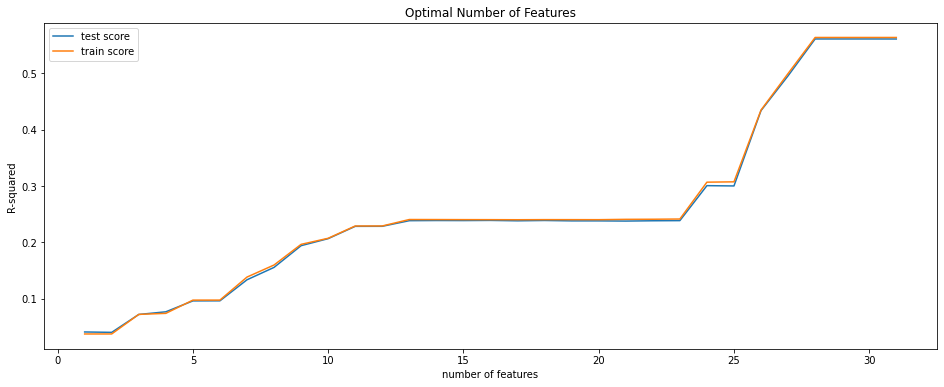

The best number of features from model_cv {'n_features_to_select': 30}


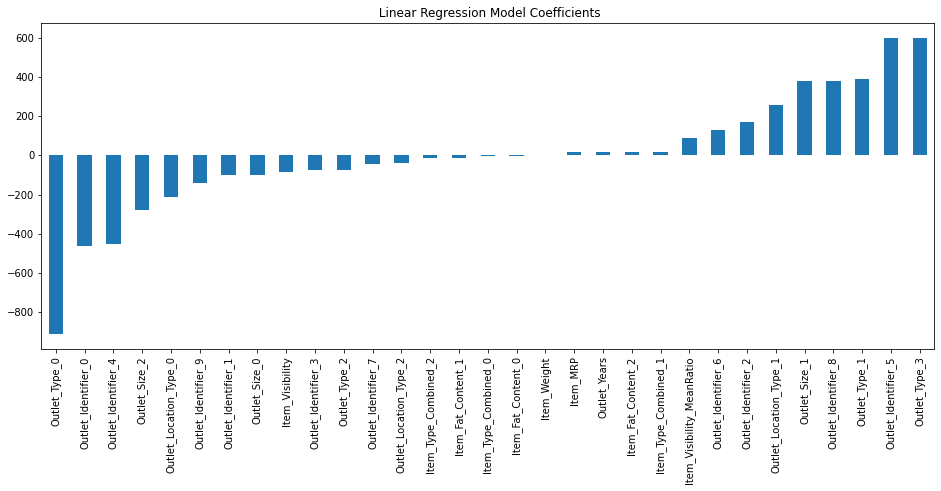

The R-squared score of LinearRegression:  0.5575112472451083
The RMSE score of LinearRegression:  1204574.750664708
The MAE score of LinearRegression:  820.5330777425038


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# step-1: create a cross-validation scheme
folds = 5

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 32))}]

# step-3: perform grid search
# specify model
lin_Reg = LinearRegression()
lin_Reg.fit(X_train, y_train)
rfe = RFE(lin_Reg)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('R-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()
         
# checking best alpha from model_cv
print("The best number of features from model_cv", model_cv.best_params_)

# final model
n_features_optimal = 30
lin_Reg = LinearRegression()
X_train_linReg, X_test_linReg, y_train_linReg, y_test_linReg = train_test_split(X_train, y_train, test_size=0.2)
lin_Reg.fit(X_train_linReg, y_train_linReg)

# plot coefficient 
plt.figure(figsize=(16,6))
features =  X_train.columns
coef_lin_Reg = pd.Series(lin_Reg.coef_, features).sort_values()
coef_lin_Reg.plot(kind='bar', title=' Linear Regression Model Coefficients')
plt.show()

# using n_features_optimalto fit the model
rfe = RFE(lin_Reg, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_linReg, y_train_linReg)

# predict sales of X_test_linReg
y_pred_linReg = rfe.predict(X_test_linReg)

# Eveluate the model
# R-suqared
r2_linReg = rfe.score(X_train_linReg, y_train_linReg)
print("The R-squared score of LinearRegression: ",r2_linReg)
# RMSE
RMSE_linReg = metrics.mean_squared_error(y_test_linReg, y_pred_linReg)
print("The RMSE score of LinearRegression: ", RMSE_linReg)
# MAE
MAE_linReg = metrics.mean_absolute_error(y_test_linReg, y_pred_linReg)
print("The MAE score of LinearRegression: ", MAE_linReg)



Polynomial Regression

In [ ]:
# from sklearn.linear_model import PolynomialRegression

# param_grid = [{'poly_degree': [2, 3, 4, 5, 6, 7, 8, 9]}]

# # defining cross validation folds as 5
# folds = 5

# #initialising PolynomialRegression() function
# polynomial = PolynomialRegression()
# model_cv = GridSearchCV(polynomial, param_grid, 
#                          cv=5, 
#                          scoring='r2', 
#                          verbose=3) 

# # fiting GridSearchCV() with X_train and y_train
# model_cv.fit(X_train,y_train)
          
#  # Saving GridSearchCV results into a dataframe 
# cv_results = pd.DataFrame(model_cv.cv_results_)

# # cv_results head
# cv_results.head()

# # plotting
# plt.figure(figsize=(16,8))
# plt.plot(cv_results['param_poly_degree'],cv_results['mean_train_score'])
# plt.plot(cv_results['param_poly_degree'],cv_results['mean_test_score'])
# plt.title('R-squared and poly_degree')
# plt.xlabel('poly_degree')
# plt.ylabel('R-squared')
# plt.legend(['train score','test score'],loc='upper right')
# plt.show()
          
# # checking best alpha from model_cv
# print("The best poly_degree from model_cv", model_cv.best_params_)

# #final model
# degree = 10 
# ridge =PolynomialRegression(degree=degree)

# #fitting model
# ridge.fit(X_train,y_train)

# # plot coefficient 
# plt.figure(figsize=(16,6))
# features =  X_train.columns
# coef_ridge = pd.Series(ridge.coef_, features).sort_values()
# coef_ridge.plot(kind='bar', title='Ridge Regression Model Coefficients')
# plt.show()

# # R-suqared of the model score
# r2_ridge = ridge.score(X_train, y_train)
# print("The R-squared score of Ridge Regression: ",r2_ridge)

# # predict sales of X_test
# y_pred_ridge = ridge.predict(X_test)



<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Ridge Regression Model
</h4>

Fitting 5 folds for each of 16 candidates, totalling 80 fits


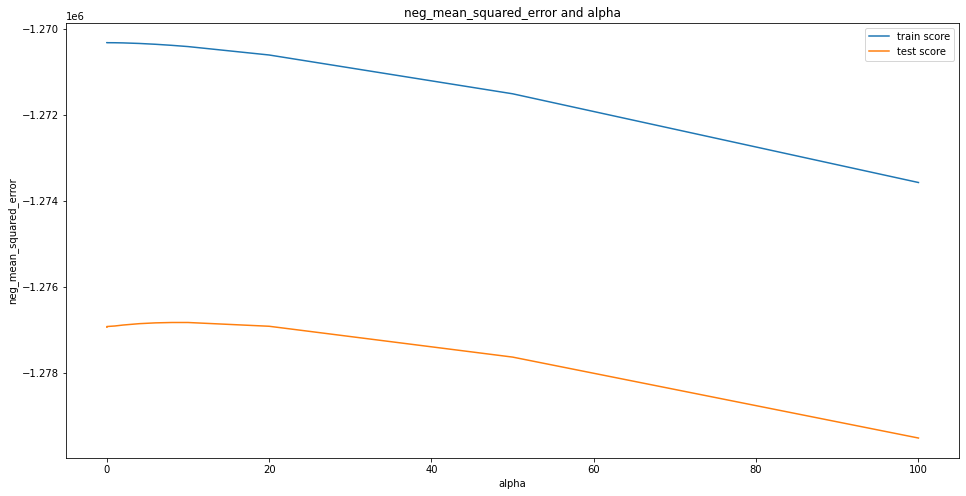

The best alpha from model_cv {'alpha': 10.0}


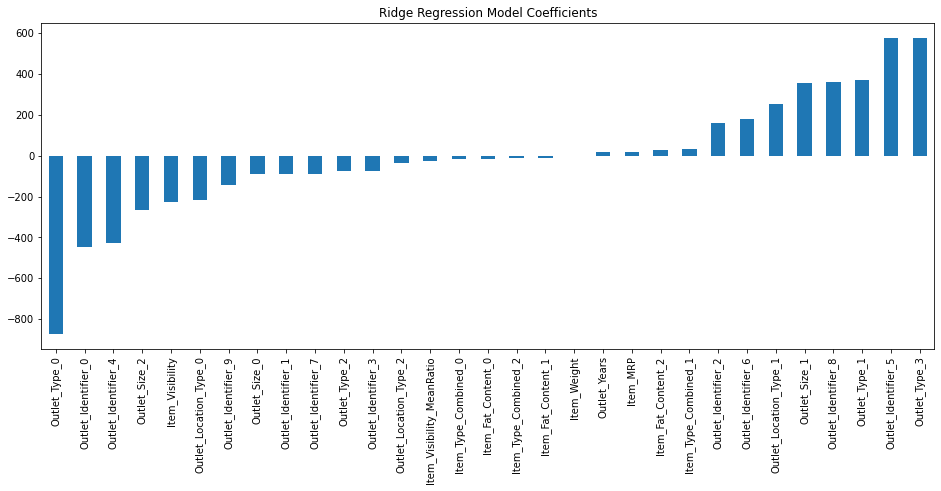

The R-squared score of Ridge Regression:  0.5631435022061182
The RMSE score of LinearRegression:  1313577.6261705693
The MAE score of LinearRegression:  836.4531788124508


In [45]:
from sklearn.linear_model import Ridge

params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 20, 50, 100]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5
          
# Defining GridSearchCV
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
model_cv.fit(X_train,y_train)
          
 # Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(model_cv.cv_results_)

# # filter cv_results with all param_alpha less than or equal to 200
# cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()
          
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.title('R-squared and alpha')
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.legend(['train score','test score'],loc='upper right')
plt.show()
          
# checking best alpha from model_cv
print("The best alpha from model_cv", model_cv.best_params_)
 

#final model
alpha = 10 
ridge =Ridge(alpha=alpha)
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_train, y_train, test_size=0.2)

#fitting model
ridge.fit(X_train_ridge,y_train_ridge)

# plot coefficient 
plt.figure(figsize=(16,6))
features =  X_train.columns
coef_ridge = pd.Series(ridge.coef_, features).sort_values()
coef_ridge.plot(kind='bar', title='Ridge Regression Model Coefficients')
plt.show()

# predict sales of X_test_ridge
y_pred_ridge = ridge.predict(X_test_ridge)

# Eveluate the model
# R-suqared
r2_ridge = ridge.score(X_train_ridge, y_train_ridge)
print("The R-squared score of Ridge Regression: ",r2_ridge)
# RMSE
RMSE_ridge = metrics.mean_squared_error(y_test_ridge, y_pred_ridge)
print("The RMSE score of LinearRegression: ", RMSE_ridge)
# MAE
MAE_ridge = metrics.mean_absolute_error(y_test_ridge, y_pred_ridge)
print("The MAE score of LinearRegression: ", MAE_ridge)


<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Lasso Regression
</h4>

Fitting 5 folds for each of 16 candidates, totalling 80 fits


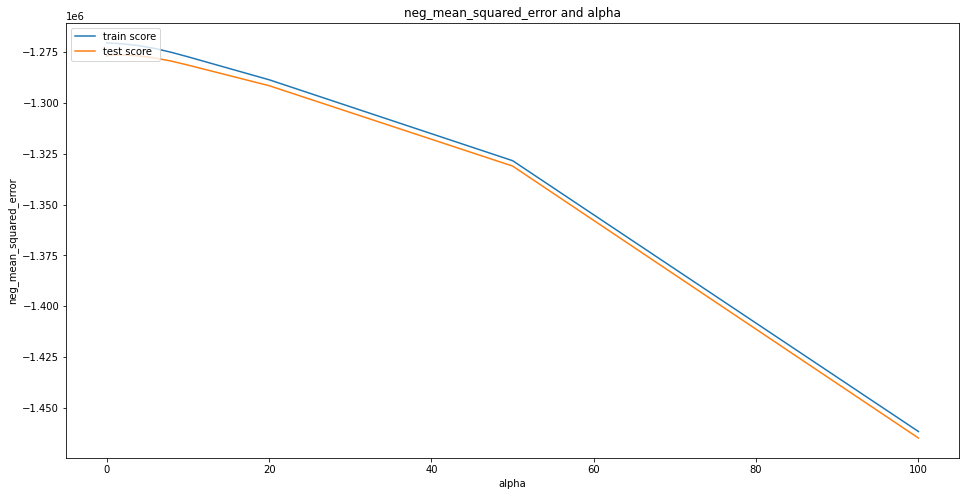

The best alpha from model_cv {'alpha': 2.0}


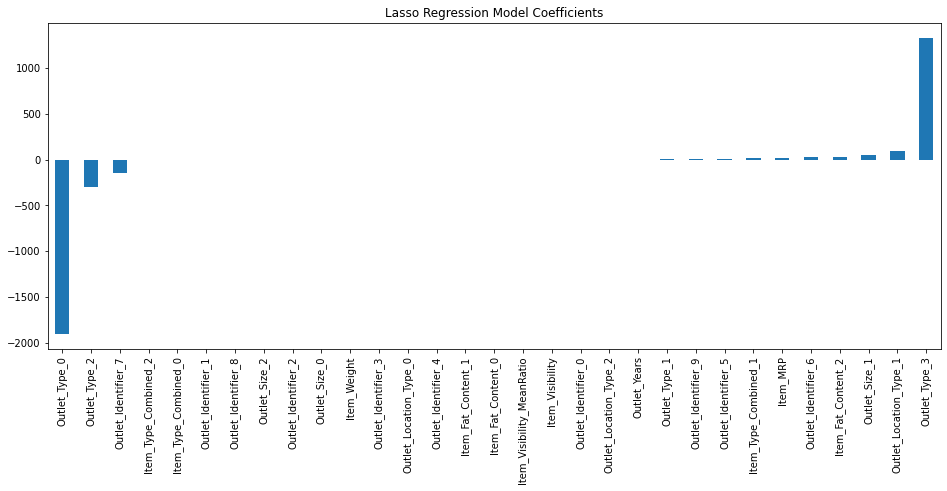

The R-squared score of Lasso Regression:  0.5620884392425506
The RMSE score of Lasso Regression:  1271537.9167466753
The MAE score of Lasso Regression:  846.1259455488473


In [46]:
from sklearn.linear_model import Lasso

# Initialising Lasso()
lasso = Lasso()

#usig same attributes used for Ridge tuning except estimator here would be lasso
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fiting model_cv
model_cv.fit(X_train,y_train)

# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()

# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.title('R-squared and alpha')
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.legend(['train score','test score'],loc='upper left')
plt.show()

# Checking best  alpha from model_cv
print("The best alpha from model_cv", model_cv.best_params_)

# final model
alpha =2.0
lasso =Lasso(alpha=alpha)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_train, y_train, test_size=0.2)
  
# fiting lasso
lasso.fit(X_train,y_train)

# plot coefficient 
plt.figure(figsize=(16,6))
features =  X_train.columns
coef_lasso = pd.Series(lasso.coef_, features).sort_values()
coef_lasso.plot(kind='bar', title='Lasso Regression Model Coefficients')
plt.show()

# predict sales of X_test_lasso
y_pred_lasso = ridge.predict(X_test_lasso)

# Eveluate the model
# R-suqared
r2_lasso = lasso.score(X_train_lasso, y_train_lasso)
print("The R-squared score of Lasso Regression: ",r2_lasso)
# RMSE
RMSE_lasso = metrics.mean_squared_error(y_test_lasso, y_pred_lasso)
print("The RMSE score of Lasso Regression: ", RMSE_lasso)
# MAE
MAE_lasso = metrics.mean_absolute_error(y_test_lasso, y_pred_lasso)
print("The MAE score of Lasso Regression: ", MAE_lasso)


<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
ElasticNet Regression
</h4>

Fitting 5 folds for each of 49 candidates, totalling 245 fits


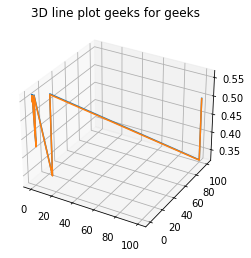

The best alpha and l1_ratio from model_cv {'alpha': 1.0, 'l1_ratio': 1.0}


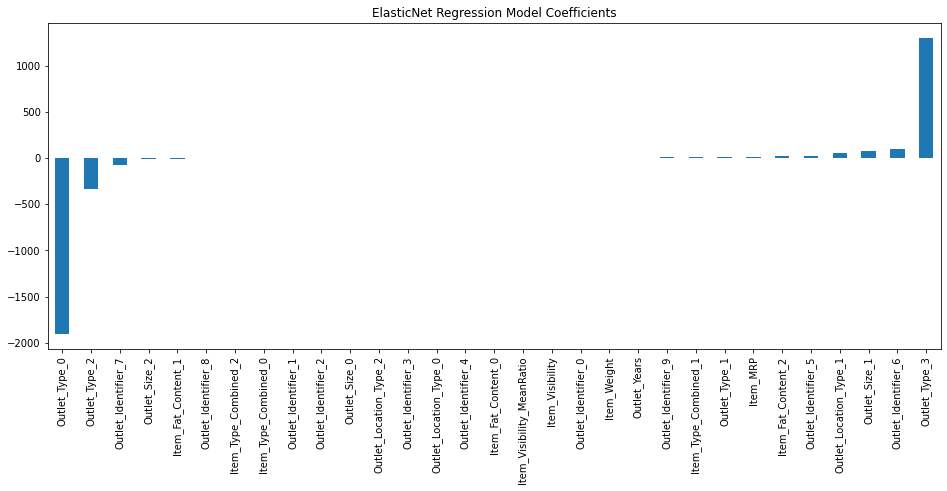

The R-squared score of ElasticNet Regression:  0.5654236218400219
The RMSE score of ElasticNet Regression:  1299521.59166083
The MAE score of ElasticNet Regression:  834.8878863276885


In [10]:
from sklearn.linear_model import ElasticNet

# Initialising ElasticNet()
elasticnet = ElasticNet() 

params= {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],"l1_ratio": [0.0, 0.2,0.4, 0.5,0.6, 0.8, 1.0]}

#using same attributes used for Ridge tuning except estimator here would be ElasticNet
model_cv = GridSearchCV(estimator=elasticnet,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fitingmodel_cv
model_cv.fit(X_train,y_train)

# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
cv_results['param_l1_ratio'] = cv_results['param_alpha'].astype('int32')

# plotting 
# plt.figure(figsize=(16,8))
# plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
# plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
# plt.title('R-squared and alpha')
# plt.xlabel('alpha')
# plt.ylabel('R-squared')
# plt.legend(['train score','test score'],loc='upper left')
# plt.show()

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
# plotting
ax.plot3D(cv_results['param_l1_ratio'],cv_results['param_alpha'],  cv_results['mean_train_score'])
ax.plot3D(cv_results['param_l1_ratio'],cv_results['param_alpha'],  cv_results['mean_test_score'])
ax.set_title('3D line plot geeks for geeks')
plt.show()

# Checking best alpha from model_cv
print("The best alpha and l1_ratio from model_cv", model_cv.best_params_)

# final model
alpha =1.0
l1_ratio =1.0
elasticnet = ElasticNet(alpha=alpha, l1_ratio =l1_ratio)
X_train_elasticnet, X_test_elasticnet, y_train_elasticnet, y_test_elasticnet = train_test_split(X_train, y_train, test_size=0.2)
  
# fiting elastic net
elasticnet.fit(X_train_elasticnet,y_train_elasticnet)

# plot coefficient 
plt.figure(figsize=(16,6))
features =  X_train.columns
coef_elasticnet = pd.Series(elasticnet.coef_, features).sort_values()
coef_elasticnet.plot(kind='bar', title='ElasticNet Regression Model Coefficients')
plt.show()


# predict sales of X_test_elasticnet
y_pred_elasticnet = elasticnet.predict(X_test_elasticnet)

# Eveluate the model
# R-suqared
r2_elasticnet = elasticnet.score(X_train_elasticnet, y_train_elasticnet)
print("The R-squared score of ElasticNet Regression: ",r2_elasticnet)
# RMSE
RMSE_elasticnet = metrics.mean_squared_error(y_test_elasticnet, y_pred_elasticnet)
print("The RMSE score of ElasticNet Regression: ", RMSE_elasticnet)
# MAE
MAE_elasticnet = metrics.mean_absolute_error(y_test_elasticnet, y_pred_elasticnet)
print("The MAE score of ElasticNet Regression: ", MAE_elasticnet)




<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Random Forest Model
</h4>


Fitting 5 folds for each of 63 candidates, totalling 315 fits


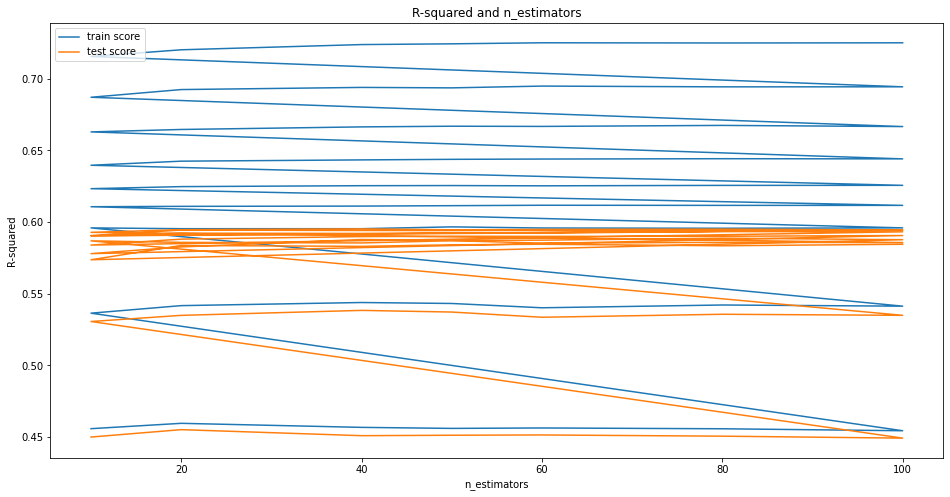

The best params_ from model_cv {'max_depth': 5, 'n_estimators': 40}


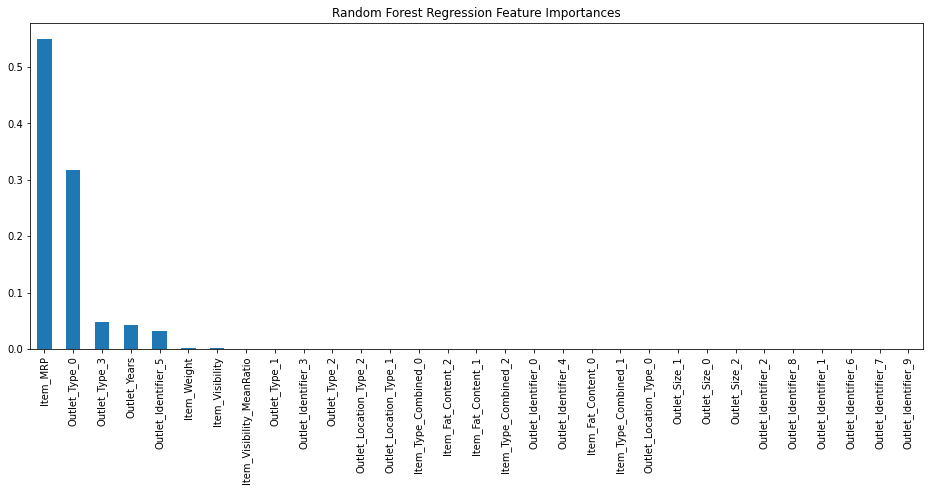

The R-squared score of RandomForest Regression:  0.6084672521291847
The RMSE score of Random Forest Regression:  1090225.401678379
The MAE score of RandomForest Regression:  730.1572895385415


In [88]:
from sklearn.ensemble import RandomForestRegressor

# Initialising RandomForestRegressor()
randomForest = RandomForestRegressor()

#using same attributes used for randomForest tuning except estimator here would be RandomForestRegressor
params = {'n_estimators':[10,20,40,50,60,80,100], 'max_depth':[2,3,4,5,6,7,8,9,10]}
model_cv = GridSearchCV(estimator=randomForest,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

#fitingmodel_cv
model_cv.fit(X_train,y_train)

# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# change n_estimators datatype to int
cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype('int32')
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_n_estimators'],cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'],cv_results['mean_test_score'])
plt.title('R-squared and n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared')
plt.legend(['train score','test score'],loc='upper left')
plt.show()

# Checking best alpha from model_cv
print("The best params_ from model_cv", model_cv.best_params_)

# final model
n_estimators=40
max_depth = 5 
randomForest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth)
X_train_randomForest, X_test_randomForest, y_train_randomForest, y_test_randomForest = train_test_split(X_train, y_train, test_size=0.2)
  
# fiting randomForest
randomForest.fit(X_train_randomForest,y_train_randomForest)

# plot coefficient 
plt.figure(figsize=(16,6))
features =  X_train.columns
coef_randomForest = pd.Series(randomForest.feature_importances_, features).sort_values(ascending=False)
coef_randomForest.plot(kind='bar', title='Random Forest Regression Feature Importances')
plt.show()

# predict sales of X_test_elasticnet
y_pred_randomForest = randomForest.predict(X_test_randomForest)

# Eveluate the model
# R-suqared
r2_randomForest = randomForest.score(X_train_randomForest, y_train_randomForest)
print("The R-squared score of RandomForest Regression: ",r2_randomForest)
# RMSE
RMSE_randomForest = metrics.mean_squared_error(y_test_randomForest, y_pred_randomForest)
print("The RMSE score of Random Forest Regression: ", RMSE_randomForest)
# MAE
MAE_randomForest = metrics.mean_absolute_error(y_test_randomForest, y_pred_randomForest)
print("The MAE score of RandomForest Regression: ", MAE_randomForest)


In [89]:
print("\nR-squared score of models:")
print("\nThe R-squared score of Linear Regression:", r2_linReg)
print("\nThe R-squared score of Ridge Regression:", r2_ridge)
print("\nThe R-squared score of Lasso Regression:", r2_lasso)
print("\nThe R-squared score of Elastic Net Regression:", r2_elasticnet)
print("\nThe R-squared score of RandomForest Net Regression:", r2_randomForest)

print("\nRMSE score of models:")
print("\nThe RMSE score of Linear Regression:", RMSE_linReg)
print("\nThe RMSE score of Ridge Regression:", RMSE_ridge)
print("\nThe RMSE score of Lasso Regression:", RMSE_lasso)
print("\nThe RMSE score of Elastic Net Regression:", RMSE_elasticnet)
print("\nThe RMSE score of Random Forest Regression:", RMSE_randomForest)


print("\nMAE score of models:")
print("\nThe MAE score of Linear Regression:", MAE_linReg)
print("\nThe MAE score of Ridge Regression:", MAE_ridge)
print("\nThe MAE score of Lasso Regression:", MAE_lasso)
print("\nThe MAE score of Elastic Net Regression:", MAE_elasticnet)
print("\nThe MAE score of Random Forest Regression:", MAE_randomForest)


R-squared score of models:

The R-squared score of Linear Regression: 0.5612789056697769

The R-squared score of Ridge Regression: 0.5631435022061182

The R-squared score of Lasso Regression: 0.5620884392425506

The R-squared score of Elastic Net Regression: 0.5642650658456039

The R-squared score of RandomForest Net Regression: 0.6084672521291847

RMSE score of models:

The RMSE score of Linear Regression: 1287910.3735835054

The RMSE score of Ridge Regression: 1313577.6261705693

The RMSE score of Lasso Regression: 1271537.9167466753

The RMSE score of Elastic Net Regression: 1263974.0581925448

The RMSE score of Random Forest Regression: 1090225.401678379

MAE score of models:

The MAE score of Linear Regression: 846.2458504993059

The MAE score of Ridge Regression: 836.4531788124508

The MAE score of Lasso Regression: 846.1259455488473

The MAE score of Elastic Net Regression: 825.5552808167571

The MAE score of Random Forest Regression: 730.1572895385415


In [100]:
# initialize list of lists
r2_data = [['Linear', r2_linReg], ['Ridge', r2_ridge], ['Lasso', r2_lasso],['Elastic Net',r2_elasticnet],['Random Forest',r2_randomForest]]
RMSE_data =  [['Linear', RMSE_linReg], ['Ridge', RMSE_ridge], ['Lasso', RMSE_lasso],['Elastic Net',RMSE_elasticnet],['Random Forest',RMSE_randomForest]]
MAE_data =  [['Linear', MAE_linReg], ['Ridge', MAE_ridge], ['Lasso', MAE_lasso],['Elastic Net',MAE_elasticnet],['Random Forest',MAE_randomForest]]


# Create the pandas DataFrame
r2_df = pd.DataFrame(r2_data, columns=['Regression model', 'R-Squared Score'])
RMSE_df = pd.DataFrame(RMSE_data, columns=['Regression model', 'RMSE Score'])
MAE_df = pd.DataFrame(MAE_data, columns=['Regression model', 'MAE Score'])


# # Plot R-Squared Score results
# plt.figure(figsize=(10, 5))
# plt.plot(r2_df['Regression model'], r2_df['R-Squared Score'], 'ro-', label='R-Squared Score')
# plt.title('R-Squared Score VS Different regression model')
# plt.xlabel('Regression model')
# plt.ylabel('R-Squared Score')
# plt.legend()
# plt.show()


# # Plot RMSE Score results
# plt.figure(figsize=(10, 5))
# plt.plot(RMSE_df['Regression model'], RMSE_df['RMSE Score'], 'bo-', label='RMSE Score')
# plt.title('RMSE Score VS Different regression model')
# plt.xlabel('Regression model')
# plt.ylabel('RMSE Score')
# plt.legend()
# plt.show()

# # Plot RMSE Score results
# plt.figure(figsize=(10, 5))
# plt.plot(MAE_df['Regression model'], MAE_df['MAE Score'], 'go-', label='MAE Score')
# plt.title('MAE Score VS Different regression model')
# plt.xlabel('Regression model')
# plt.ylabel('MAE Score')
# plt.legend()
# plt.show()



,Regression model,RMSE Score
0,Linear,1.287910e+06
1,Ridge,1.313578e+06
2,Lasso,1.271538e+06
3,Elastic Net,1.263974e+06
4,Random Forest,1.090225e+06


<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
xgboost
</h4>

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)



In [ ]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
    submission.to_csv("XGboost.csv", index=False)